In [1]:
!pip install plotly


[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.metrics import roc_curve
from sklearn.metrics import recall_score, confusion_matrix, precision_score, f1_score, accuracy_score, classification_report

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import warnings
warnings.filterwarnings('ignore')

In [4]:
df = pd.read_csv(r'C:\Users\HP\Desktop\WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [5]:
df.head()

customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract PaperlessBilling  \
0          No          No              No  Month-to-month              Yes   
1          No          No              No        One year               No   
2          No          No              No  Month-to-month              Yes   
3         Yes          No              No        One year               No   
4          No          No              No  Month-to-month              Yes   

               PaymentMethod MonthlyCharges  TotalCharges Churn  
0           Electronic check          29.85         29.85    No  
1               Mailed check          56.95        1889.5    No  
2               Mailed check          53.85        108.15   Yes  
3  Bank transfer (automatic)          42.30       1840.75    No  
4           Electronic check          70.70        151.65   Yes  

[5 rows x 21 columns]

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [7]:
df.describe()

SeniorCitizen       tenure  MonthlyCharges
count    7043.000000  7043.000000     7043.000000
mean        0.162147    32.371149       64.761692
std         0.368612    24.559481       30.090047
min         0.000000     0.000000       18.250000
25%         0.000000     9.000000       35.500000
50%         0.000000    29.000000       70.350000
75%         0.000000    55.000000       89.850000
max         1.000000    72.000000      118.750000

In [8]:
df.shape

(7043, 21)

# Our Numerical Variables are:




Monthly Charges Tenure Total Charges

# All other variables are categorical 

# Visulaistion of Categorical Features

In [9]:
def bar_plot(variable):
    "input - variable,example - Gender"
    "Output - Bar Plot "
    
    var=df[variable]
    varValue=var.value_counts()
    
    #visualize
    plt.figure(figsize=(5,2))
    plt.bar(varValue.index,varValue)
    plt.xticks(varValue.index,varValue.index.values)
    plt.ylabel("Frequency")
    plt.title(variable)
    plt.show()
    print("{}: \n {}".format(variable,varValue))

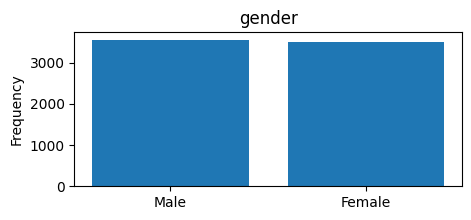

gender: 
 gender
Male      3555
Female    3488
Name: count, dtype: int64


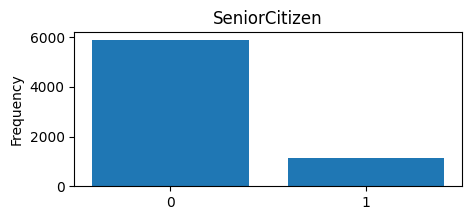

SeniorCitizen: 
 SeniorCitizen
0    5901
1    1142
Name: count, dtype: int64


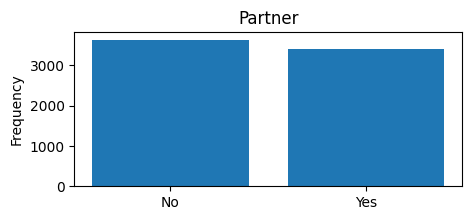

Partner: 
 Partner
No     3641
Yes    3402
Name: count, dtype: int64


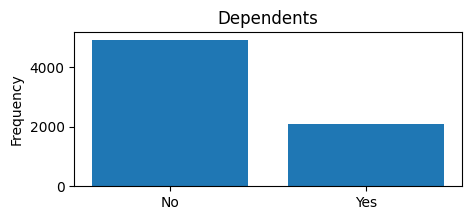

Dependents: 
 Dependents
No     4933
Yes    2110
Name: count, dtype: int64


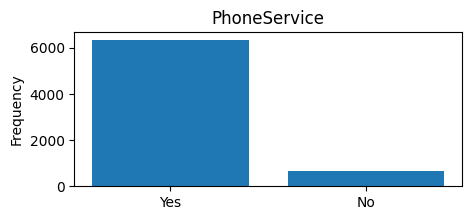

PhoneService: 
 PhoneService
Yes    6361
No      682
Name: count, dtype: int64


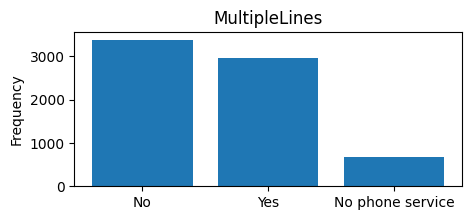

MultipleLines: 
 MultipleLines
No                  3390
Yes                 2971
No phone service     682
Name: count, dtype: int64


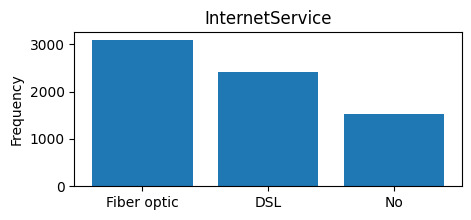

InternetService: 
 InternetService
Fiber optic    3096
DSL            2421
No             1526
Name: count, dtype: int64


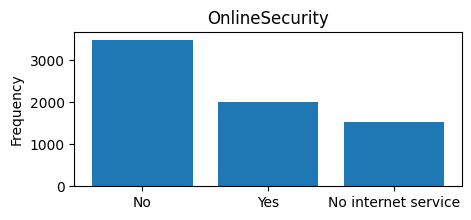

OnlineSecurity: 
 OnlineSecurity
No                     3498
Yes                    2019
No internet service    1526
Name: count, dtype: int64


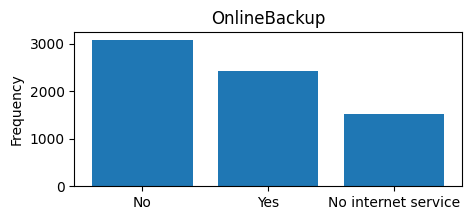

OnlineBackup: 
 OnlineBackup
No                     3088
Yes                    2429
No internet service    1526
Name: count, dtype: int64


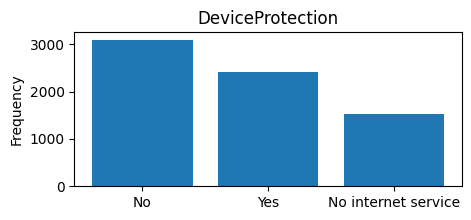

DeviceProtection: 
 DeviceProtection
No                     3095
Yes                    2422
No internet service    1526
Name: count, dtype: int64


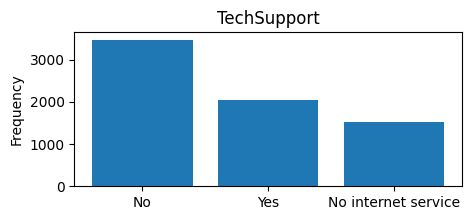

TechSupport: 
 TechSupport
No                     3473
Yes                    2044
No internet service    1526
Name: count, dtype: int64


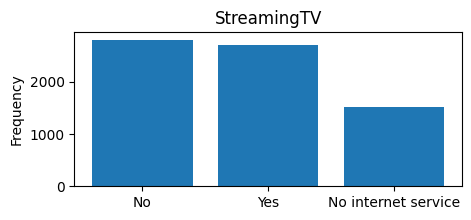

StreamingTV: 
 StreamingTV
No                     2810
Yes                    2707
No internet service    1526
Name: count, dtype: int64


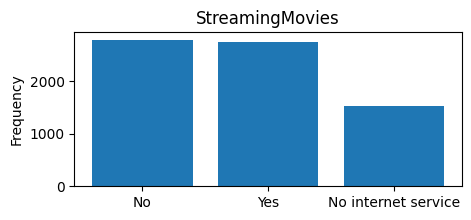

StreamingMovies: 
 StreamingMovies
No                     2785
Yes                    2732
No internet service    1526
Name: count, dtype: int64


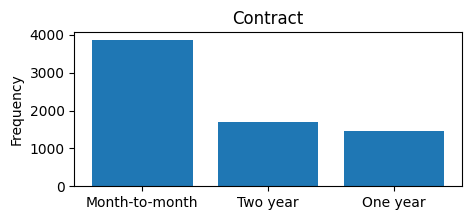

Contract: 
 Contract
Month-to-month    3875
Two year          1695
One year          1473
Name: count, dtype: int64


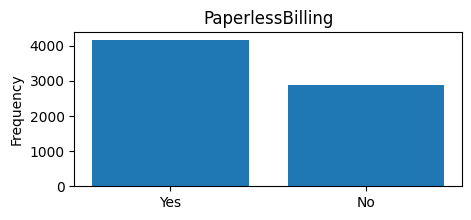

PaperlessBilling: 
 PaperlessBilling
Yes    4171
No     2872
Name: count, dtype: int64


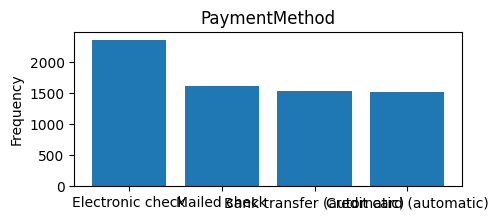

PaymentMethod: 
 PaymentMethod
Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: count, dtype: int64


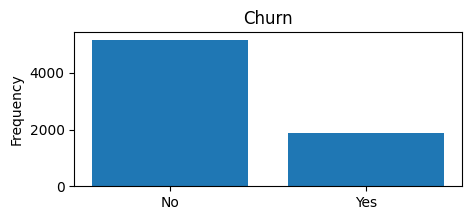

Churn: 
 Churn
No     5174
Yes    1869
Name: count, dtype: int64


In [10]:
category1= df.drop(df.columns[[0, 5, -2, -3]], axis=1)
for c in category1:
    bar_plot(c)

In [11]:
def draw_countplots(df,n_rows,n_cols):
    columns=df.columns
    n_plots=len(columns)
    
    fig,axes=plt.subplots(n_rows,n_cols,figsize=(n_cols*5,n_rows*5))
    fig.subplots_adjust(hspace=0.5,wspace=0.5)
    
    for i, col in enumerate(columns):
        row=i//n_cols
        col_idx=i%n_cols
        sns.countplot(data=df,x=df[col],ax=axes[row,col_idx],hue='Churn')
        axes[row,col_idx].set_title(col)
        
    for remaining in range(i+1,n_rows*n_cols):
        row=remaining//n_cols
        col_idx=remaining%n_cols
        fig.delaxes(axes[row,col_idx])
    fig.suptitle("Histplots of all Category Columns")
    plt.show()

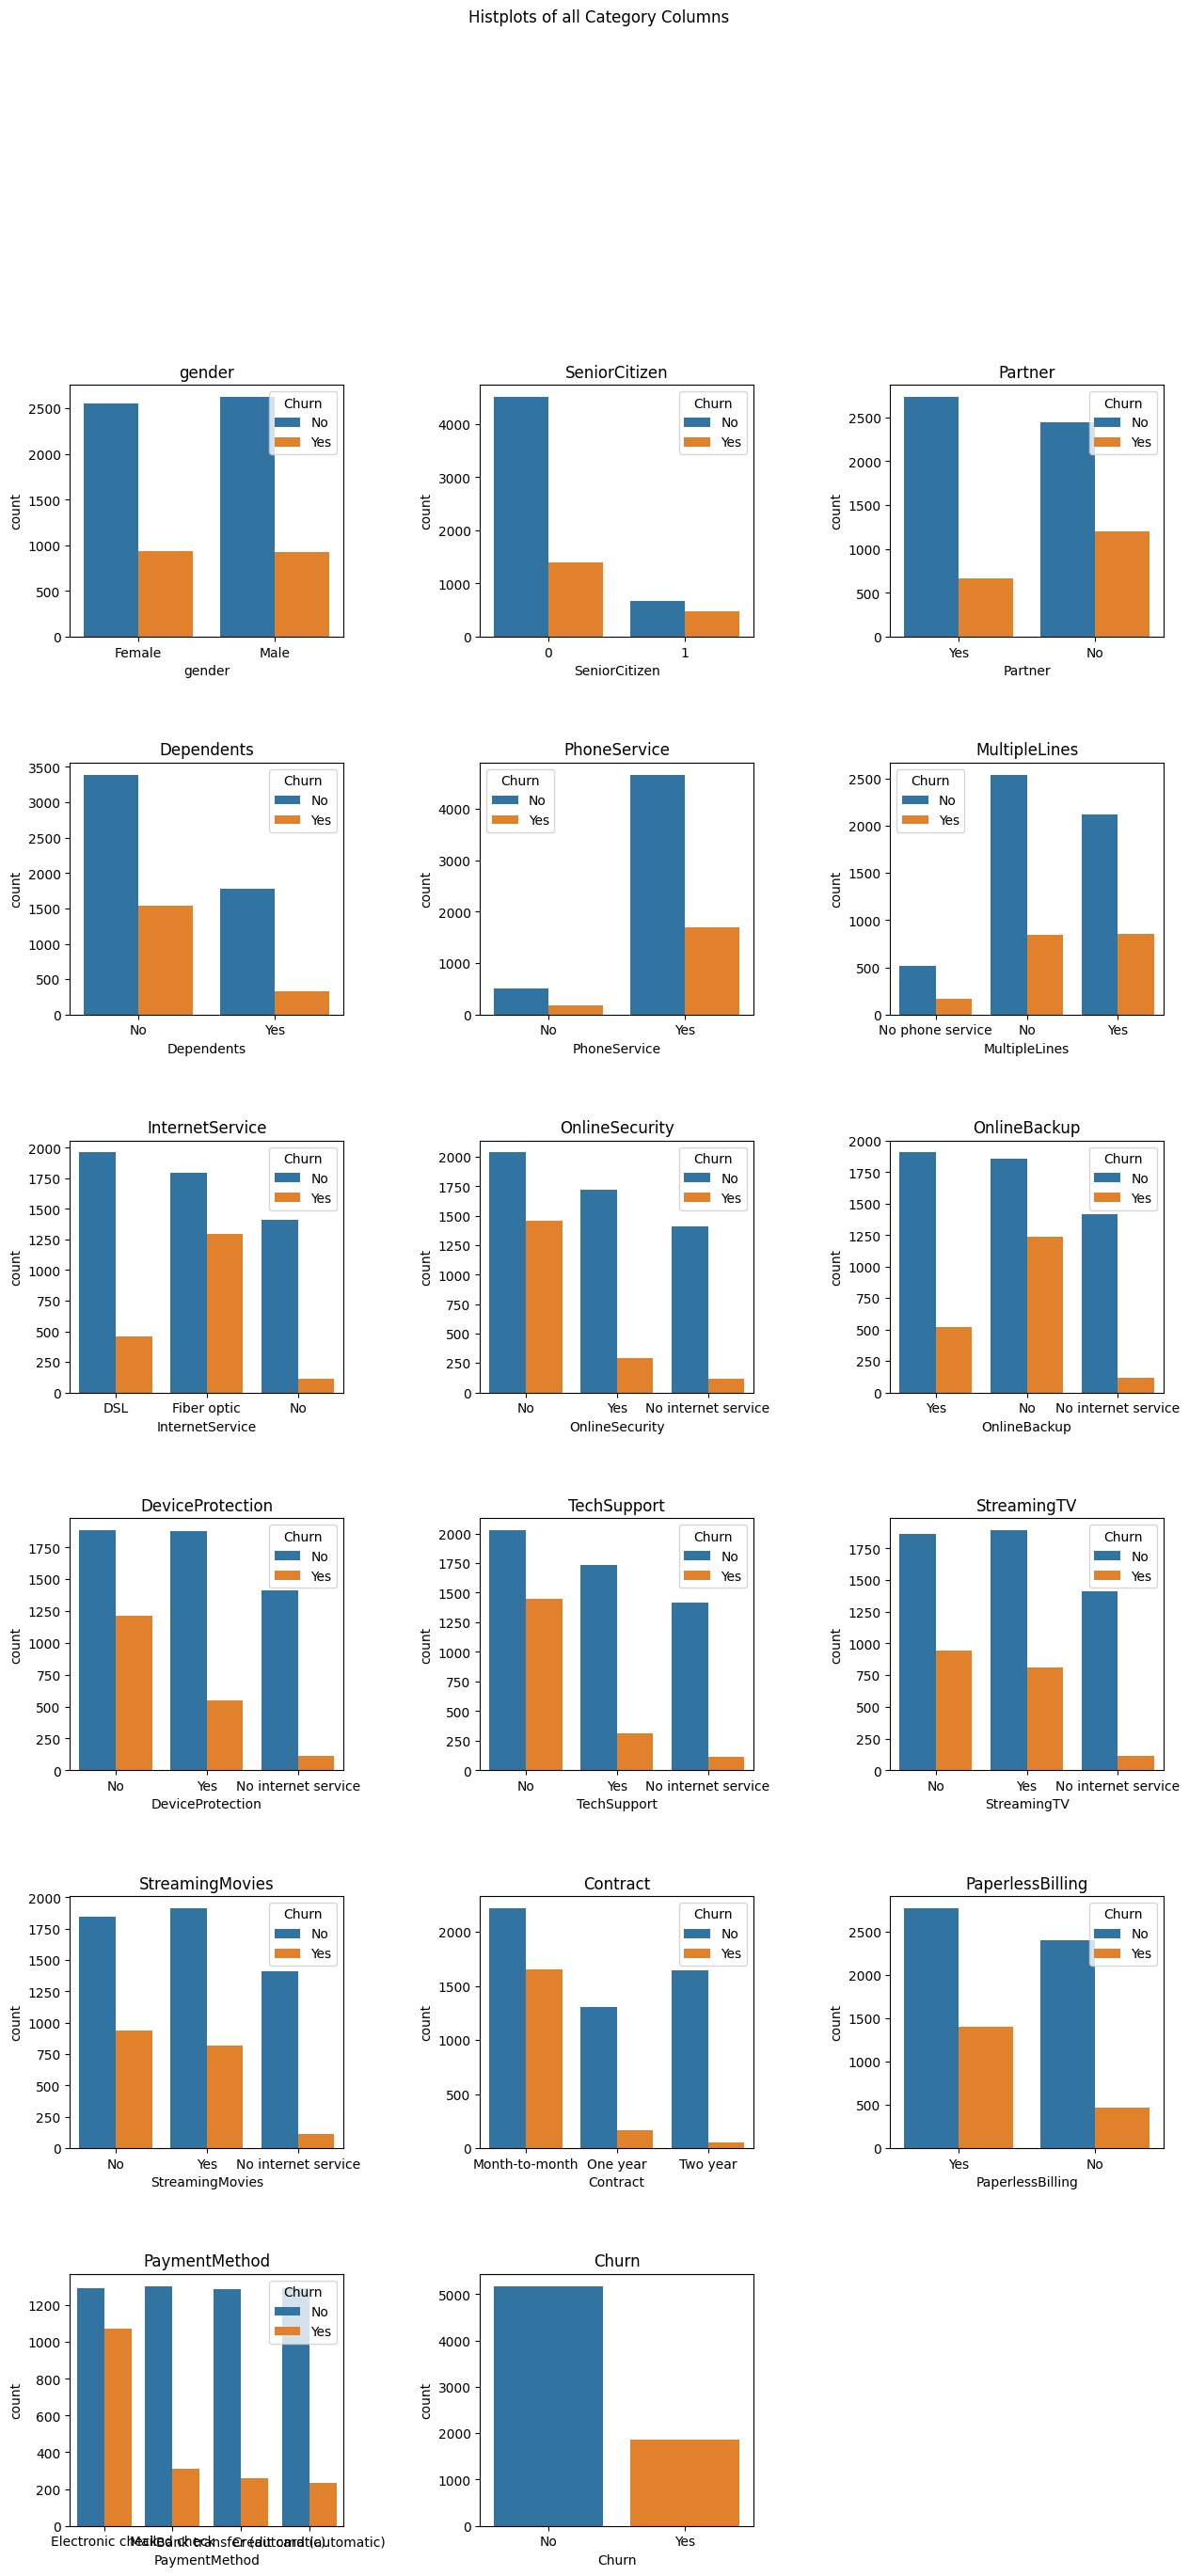

In [12]:
draw_countplots(category1,8,3)

# Numerical Variables Distribution

In [13]:
def plot_hist(variable3):
    plt.figure(figsize=(9,3))
    plt.hist(df[variable3],bins=50)
    plt.xlabel(variable3)
    plt.ylabel("Frequency")
    plt.title("{} distribution with histogram plot.".format(variable3))
    plt.show()

In [14]:
df['TotalCharges']= pd.to_numeric(df['TotalCharges'],errors = 'coerce')
numericVar = ['tenure','MonthlyCharges','TotalCharges']

In [15]:
numericVar

['tenure', 'MonthlyCharges', 'TotalCharges']

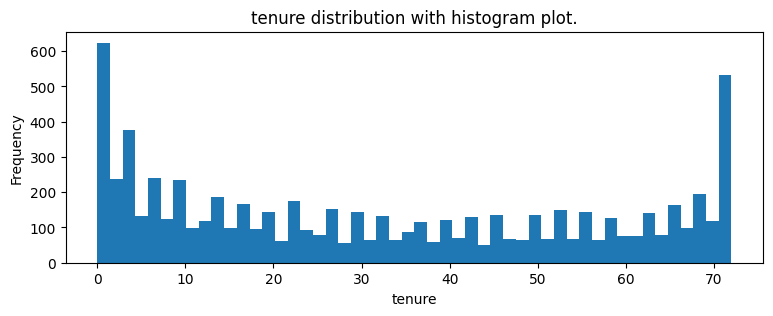

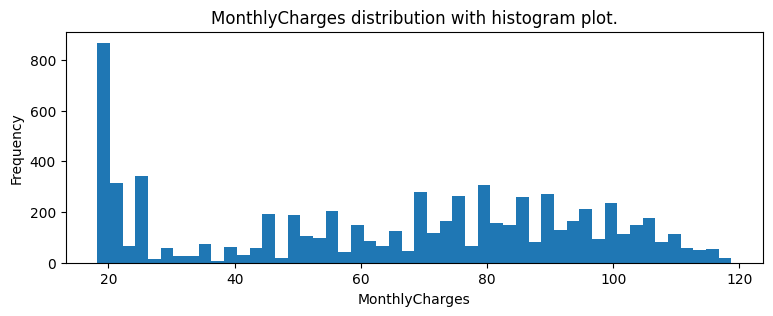

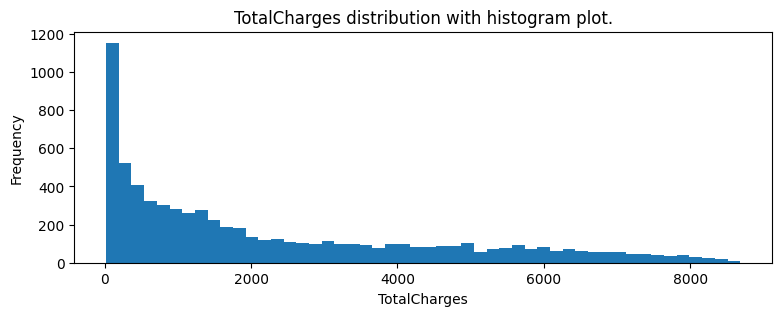

In [16]:
for n in numericVar:
    plot_hist(n)

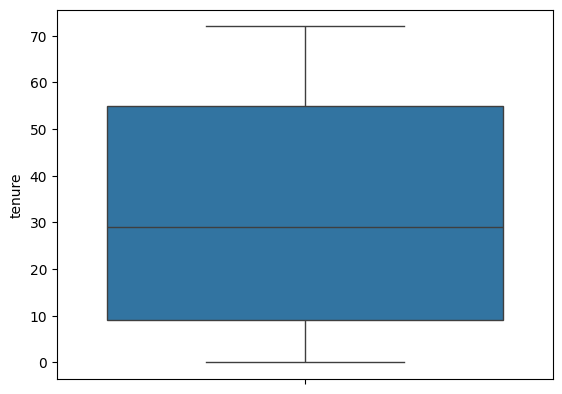

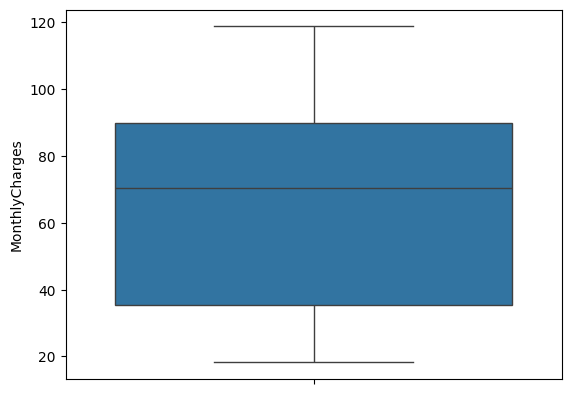

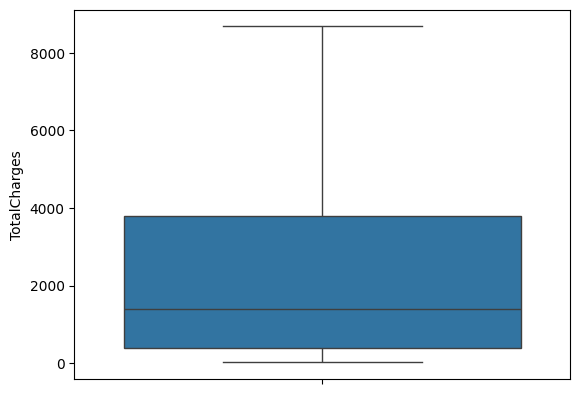

In [17]:
for n2 in numericVar:
    sns.boxplot(y=n2,data=df)
    plt.show()

In [18]:
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [19]:
df.fillna(df["TotalCharges"].mean(),inplace=True)

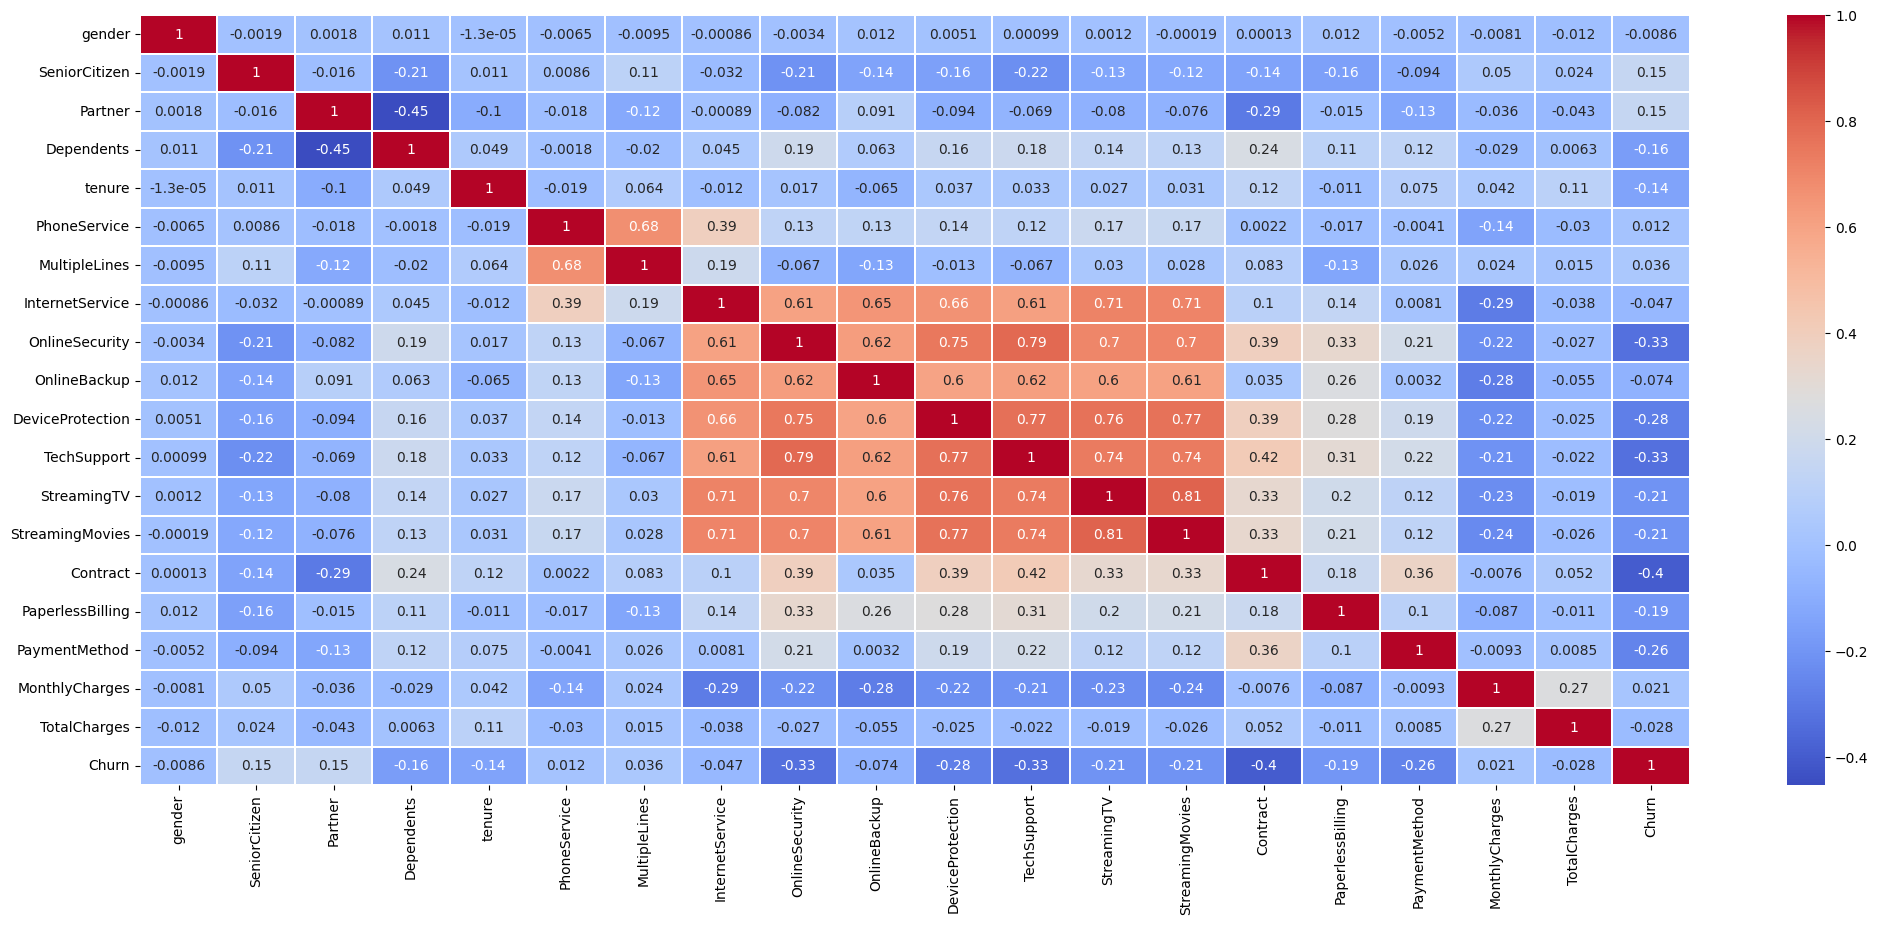

In [20]:
df.drop('customerID', axis=1, inplace=True)
plt.figure(figsize=(25, 10))

corr = df.apply(lambda x: pd.factorize(x)[0]).corr()

ax = sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, linewidths=.2, cmap='coolwarm')
plt.show()

In [21]:
def object_to_int(dataframe_series):
    if dataframe_series.dtype=='object':
        dataframe_series = LabelEncoder().fit_transform(dataframe_series)
    return dataframe_series

In [22]:
df = df.apply(lambda x: object_to_int(x))
df.head()

gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  \
0       0              0        1           0       1             0   
1       1              0        0           0      34             1   
2       1              0        0           0       2             1   
3       1              0        0           0      45             0   
4       0              0        0           0       2             1   

   MultipleLines  InternetService  OnlineSecurity  OnlineBackup  \
0              1                0               0             2   
1              0                0               2             0   
2              0                0               2             2   
3              1                0               2             0   
4              0                1               0             0   

   DeviceProtection  TechSupport  StreamingTV  StreamingMovies  Contract  \
0                 0            0            0                0         0   
1                 2            0            0                0         1   
2                 0            0            0                0         0   
3                 2            2            0                0         1   
4                 0            0            0                0         0   

   PaperlessBilling  PaymentMethod  MonthlyCharges  TotalCharges  Churn  
0                 1              2           29.85         29.85      0  
1                 0              3           56.95       1889.50      0  
2                 1              3           53.85        108.15      1  
3                 0              0           42.30       1840.75      0  
4                 1              2           70.70        151.65      1

# Splitting Data

In [23]:
x = df.drop(['Churn'],axis = 1)

In [24]:
x

gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  \
0          0              0        1           0       1             0   
1          1              0        0           0      34             1   
2          1              0        0           0       2             1   
3          1              0        0           0      45             0   
4          0              0        0           0       2             1   
...      ...            ...      ...         ...     ...           ...   
7038       1              0        1           1      24             1   
7039       0              0        1           1      72             1   
7040       0              0        1           1      11             0   
7041       1              1        1           0       4             1   
7042       1              0        0           0      66             1   

      MultipleLines  InternetService  OnlineSecurity  OnlineBackup  \
0                 1                0               0             2   
1                 0                0               2             0   
2                 0                0               2             2   
3                 1                0               2             0   
4                 0                1               0             0   
...             ...              ...             ...           ...   
7038              2                0               2             0   
7039              2                1               0             2   
7040              1                0               2             0   
7041              2                1               0             0   
7042              0                1               2             0   

      DeviceProtection  TechSupport  StreamingTV  StreamingMovies  Contract  \
0                    0            0            0                0         0   
1                    2            0            0                0         1   
2                    0            0            0                0         0   
3                    2            2            0                0         1   
4                    0            0            0                0         0   
...                ...          ...          ...              ...       ...   
7038                 2            2            2                2         1   
7039                 2            0            2                2         1   
7040                 0            0            0                0         0   
7041                 0            0            0                0         0   
7042                 2            2            2                2         2   

      PaperlessBilling  PaymentMethod  MonthlyCharges  TotalCharges  
0                    1              2           29.85         29.85  
1                    0              3           56.95       1889.50  
2                    1              3           53.85        108.15  
3                    0              0           42.30       1840.75  
4                    1              2           70.70        151.65  
...                ...            ...             ...           ...  
7038                 1              3           84.80       1990.50  
7039                 1              1          103.20       7362.90  
7040                 1              2           29.60        346.45  
7041                 1              3           74.40        306.60  
7042                 1              0          105.65       6844.50  

[7043 rows x 19 columns]

In [25]:
y = df['Churn']

In [26]:
y

0       0
1       0
2       1
3       0
4       1
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: Churn, Length: 7043, dtype: int32

In [27]:
y = y.to_frame()

In [28]:
y

Churn
0         0
1         0
2         1
3         0
4         1
...     ...
7038      0
7039      0
7040      0
7041      1
7042      0

[7043 rows x 1 columns]

In [29]:
y.value_counts()

Churn
0        5174
1        1869
Name: count, dtype: int64

In [30]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [31]:
y_train.value_counts()

Churn
0        4138
1        1496
Name: count, dtype: int64

In [32]:
!pip install imbalanced-learn
from imblearn.over_sampling import SMOTE
smote= SMOTE()


[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [33]:
x_smt,y_smt = smote.fit_resample(x_train,y_train)

In [34]:
y_smt.value_counts()

Churn
0        4138
1        4138
Name: count, dtype: int64

In [35]:
model_lr = LogisticRegression(solver='liblinear')
model_dt = DecisionTreeClassifier()
model_rf = RandomForestClassifier()

# Logistic Regression

In [36]:
model_lr.fit(x_smt,y_smt)

LogisticRegression(solver='liblinear')

In [37]:
model_lr.score(x_smt,y_smt)

0.8037699371677138

In [38]:
param_lr = {
    'penalty':['l1','l2'],
    'C':[0.01,0.1,0.5,0.9,1,5,10],
    'tol':[1e-4,1e-2,1,1e2]
}

In [39]:
GSLR3 = GridSearchCV(model_lr,param_lr,cv=5,scoring='accuracy')
GSLR3.fit(x_smt,y_smt)

GridSearchCV(cv=5, estimator=LogisticRegression(solver='liblinear'),
             param_grid={'C': [0.01, 0.1, 0.5, 0.9, 1, 5, 10],
                         'penalty': ['l1', 'l2'],
                         'tol': [0.0001, 0.01, 1, 100.0]},
             scoring='accuracy')

In [40]:
print('best_param:',GSLR3.best_params_)
print('best_score:',GSLR3.best_score_)

best_param: {'C': 0.1, 'penalty': 'l2', 'tol': 0.0001}
best_score: 0.7943514018418786


In [41]:
pred_lr = GSLR3.predict(x_test)
print(classification_report(y_test,pred_lr))

              precision    recall  f1-score   support

           0       0.90      0.77      0.83      1036
           1       0.54      0.77      0.64       373

    accuracy                           0.77      1409
   macro avg       0.72      0.77      0.73      1409
weighted avg       0.81      0.77      0.78      1409



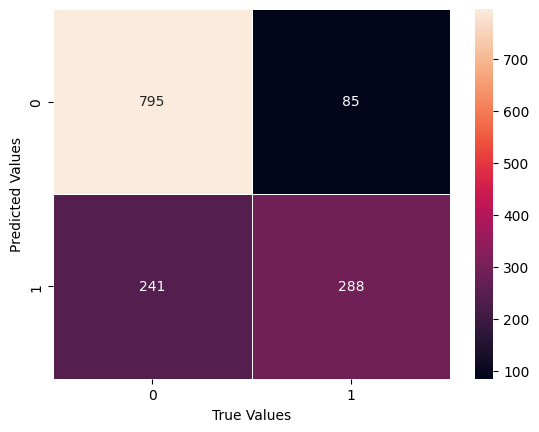

In [42]:
cm = confusion_matrix(pred_lr,y_test)
sns.heatmap(cm, annot = True, linewidth = 0.5, linecolor = "white", fmt =".0f")
plt.xlabel("True Values")
plt.ylabel("Predicted Values")
plt.show()

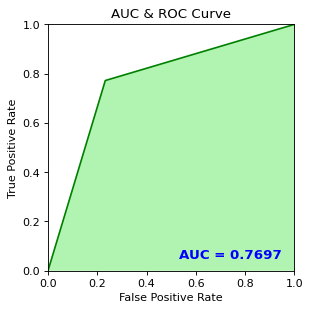

In [43]:
from sklearn.metrics import roc_auc_score,roc_curve
roc_auc = roc_auc_score(y_test, pred_lr)

false_positive_rate, true_positive_rate, thresolds =roc_curve(y_test, pred_lr)

plt.figure(figsize=(5, 4), dpi=80)
plt.axis('scaled')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.title("AUC & ROC Curve")
plt.plot(false_positive_rate, true_positive_rate, 'g')
plt.fill_between(false_positive_rate, true_positive_rate, facecolor='lightgreen', alpha=0.7)
plt.text(0.95, 0.05, 'AUC = %0.4f' % roc_auc, ha='right', fontsize=12, weight='bold', color='blue')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()


# Decision Tree

In [44]:
model_dt.fit(x_smt,y_smt)

DecisionTreeClassifier()

In [45]:
model_dt.score(x_smt,y_smt)

0.9990333494441759

In [46]:
param_dt = {
    'criterion':['gini','entropy'],
    'min_samples_split':[2,5,10,15], #min number of samples required to split an internal node, higher the min sample ,better it is, prevents overfitting
    'max_depth':[None,10,15,20,25,30,35],      #max number of obs 
    'min_samples_leaf':[1,3,10,15],  #min number of samples required to be at a leafe node, higher values prevent overfitting
    'max_features':[None,'sqrt','log2']  #none means all features will be used, sqrt means sqrt of total features will be used, log2 means log2 of the total number of features will be use
}


In [47]:
GSDT3 = GridSearchCV(model_dt, param_dt, cv=5, scoring='accuracy')
GSDT3.fit(x_smt, y_smt)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 10, 15, 20, 25, 30, 35],
                         'max_features': [None, 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 3, 10, 15],
                         'min_samples_split': [2, 5, 10, 15]},
             scoring='accuracy')

In [48]:
print('best_param:', GSDT3.best_params_)
print('best_score:', GSDT3.best_score_)

best_param: {'criterion': 'entropy', 'max_depth': 10, 'max_features': None, 'min_samples_leaf': 10, 'min_samples_split': 5}
best_score: 0.8052294321117387


In [49]:
pred_dt3 = GSDT3.predict(x_test)
print(classification_report(pred_dt3,y_test))

              precision    recall  f1-score   support

           0       0.80      0.86      0.83       958
           1       0.65      0.53      0.58       451

    accuracy                           0.76      1409
   macro avg       0.72      0.70      0.71      1409
weighted avg       0.75      0.76      0.75      1409



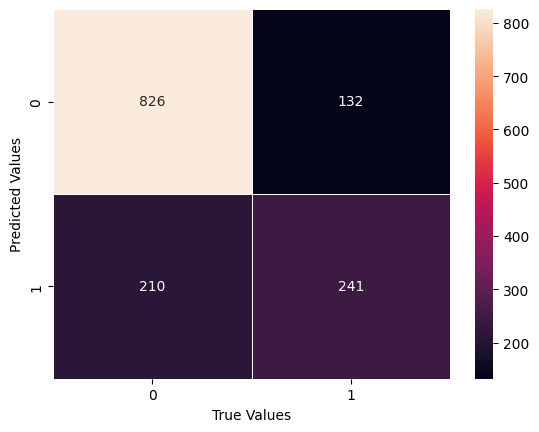

In [50]:
cm1 = confusion_matrix(pred_dt3,y_test)
sns.heatmap(cm1, annot = True, linewidth = 0.5, linecolor = "white", fmt =".0f")
plt.xlabel("True Values")
plt.ylabel("Predicted Values")
plt.show()

In [51]:
from sklearn import tree 
plt.figure(figsize=(150,100))
tree.plot_tree(model_dt, filled = True)

[Text(0.7310519776722487, 0.9833333333333333, 'x[14] <= 0.5\ngini = 0.5\nsamples = 8276\nvalue = [4138, 4138]'),
 Text(0.5566563512215432, 0.95, 'x[8] <= 0.5\ngini = 0.434\nsamples = 5557\nvalue = [1768, 3789]'),
 Text(0.643854164446896, 0.9666666666666666, 'True  '),
 Text(0.43746762549832147, 0.9166666666666666, 'x[11] <= 1.5\ngini = 0.371\nsamples = 4160\nvalue = [1024, 3136]'),
 Text(0.34202964356903065, 0.8833333333333333, 'x[2] <= 0.5\ngini = 0.332\nsamples = 3746\nvalue = [786, 2960]'),
 Text(0.2716712455413344, 0.85, 'x[16] <= 2.5\ngini = 0.28\nsamples = 2937\nvalue = [494.0, 2443.0]'),
 Text(0.20742138323541753, 0.8166666666666667, 'x[9] <= 1.5\ngini = 0.247\nsamples = 2646\nvalue = [381.0, 2265.0]'),
 Text(0.15083731116240034, 0.7833333333333333, 'x[0] <= 0.5\ngini = 0.21\nsamples = 2220\nvalue = [265, 1955]'),
 Text(0.10107729227864037, 0.75, 'x[10] <= 1.5\ngini = 0.156\nsamples = 1446\nvalue = [123, 1323]'),
 Text(0.07942325849769198, 0.7166666666666667, 'x[17] <= 76.101\ng

# Random Forest

In [53]:
import os
n_cpu = os.cpu_count()
n_thread = n_cpu * 2

In [54]:
param_rf = {
    'n_estimators':[50,100,150,200,500,700,800,900],
    'criterion':['entropy','gini'],
    'min_samples_split':[2,5,],
    'max_depth':[None,2,4,5,6,7,8,9,10,12],
    'min_samples_leaf':[1,3,10],
    'max_features':['sqrt','auto','log2']
}

In [56]:
GSRF3 = GridSearchCV(model_rf, param_rf, cv=5, scoring='accuracy', n_jobs=n_thread)
GSRF3.fit(x_smt, y_smt)

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=16,
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': [None, 2, 4, 5, 6, 7, 8, 9, 10, 12],
                         'max_features': ['sqrt', 'auto', 'log2'],
                         'min_samples_leaf': [1, 3, 10],
                         'min_samples_split': [2, 5],
                         'n_estimators': [50, 100, 150, 200, 500, 700, 800,
                                          900]},
             scoring='accuracy')

In [57]:
print('best_param:', GSRF3.best_params_)
print('best_score:', GSRF3.best_score_)

best_param: {'criterion': 'entropy', 'max_depth': None, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 900}
best_score: 0.8438985215348016


In [59]:
pred_rf3 = GSRF3.predict(x_test)
print(classification_report(y_test, pred_rf3))

              precision    recall  f1-score   support

           0       0.86      0.84      0.85      1036
           1       0.58      0.61      0.59       373

    accuracy                           0.78      1409
   macro avg       0.72      0.72      0.72      1409
weighted avg       0.78      0.78      0.78      1409



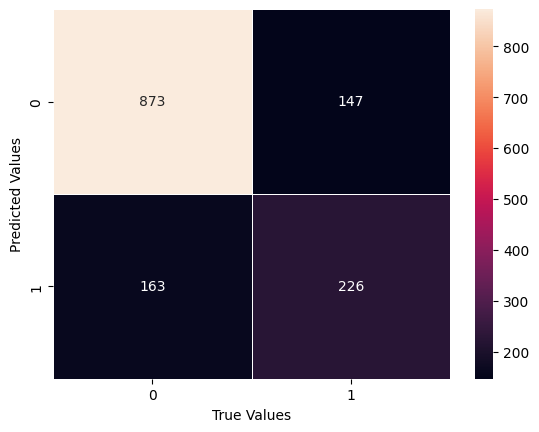

In [60]:
cm1 = confusion_matrix(pred_rf3,y_test)
sns.heatmap(cm1, annot = True, linewidth = 0.5, linecolor = "white", fmt =".0f")
plt.xlabel("True Values")
plt.ylabel("Predicted Values")
plt.show()